In [0]:
!pip3 install torch

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

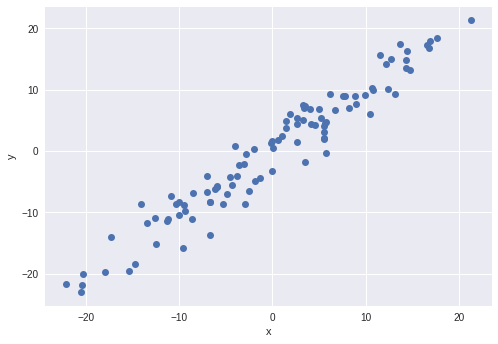

In [0]:
X = torch.randn(100,1)*10
y = X + 3*torch.randn(100,1) #noisy dataset
plt.plot(X.numpy(),y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [0]:
class LR(nn.Module): #sub-class of class Module in module (base class for all neural network modules)
  def __init__(self, input_size, output_size): #constructor to initialize new instances for the class (self - instance of class)
    super().__init__() #multiple-inheritance from parent class
    self.linear = nn.Linear(input_size, output_size) #instance of the class(object)
    
  def forward(self, x):
    pred = self.linear(x)
    return pred


In [0]:
torch.manual_seed(1)
model = LR(1,1) #linear model
print (model)



LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [0]:
[w,b] = model.parameters()
def get_paras():
  return (w[0][0].item(), b[0].item())


In [0]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_paras()
  x1 = np.array([-30,30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X,y)
  plt.show()
  

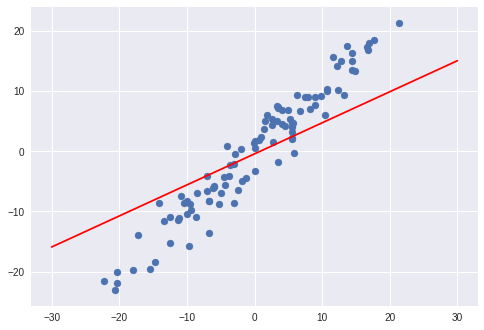

In [0]:
plot_fit('Initial')

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)


In [0]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch:", i, "loss:", loss.item())
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward() #compute gradient
  optimizer.step()

epoch: 0 loss: 31.63946533203125
epoch: 1 loss: 29.91510772705078
epoch: 2 loss: 28.310163497924805
epoch: 3 loss: 26.816314697265625
epoch: 4 loss: 25.425878524780273
epoch: 5 loss: 24.131685256958008
epoch: 6 loss: 22.927091598510742
epoch: 7 loss: 21.805866241455078
epoch: 8 loss: 20.762245178222656
epoch: 9 loss: 19.790857315063477
epoch: 10 loss: 18.886688232421875
epoch: 11 loss: 18.045074462890625
epoch: 12 loss: 17.261688232421875
epoch: 13 loss: 16.53251075744629
epoch: 14 loss: 15.85378360748291
epoch: 15 loss: 15.222013473510742
epoch: 16 loss: 14.633935928344727
epoch: 17 loss: 14.08653736114502
epoch: 18 loss: 13.577000617980957
epoch: 19 loss: 13.10269546508789
epoch: 20 loss: 12.6611909866333
epoch: 21 loss: 12.250215530395508
epoch: 22 loss: 11.867652893066406
epoch: 23 loss: 11.511534690856934
epoch: 24 loss: 11.180033683776855
epoch: 25 loss: 10.871442794799805
epoch: 26 loss: 10.584175109863281
epoch: 27 loss: 10.316756248474121
epoch: 28 loss: 10.067811965942383
epo

Text(0.5, 0, 'epoch')

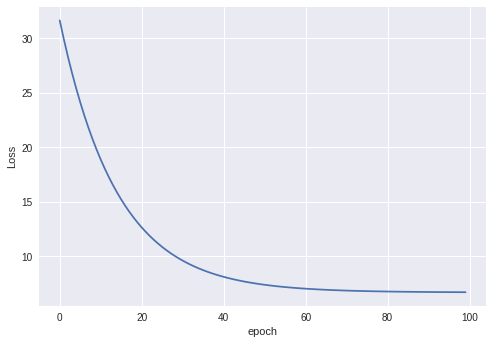

In [0]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

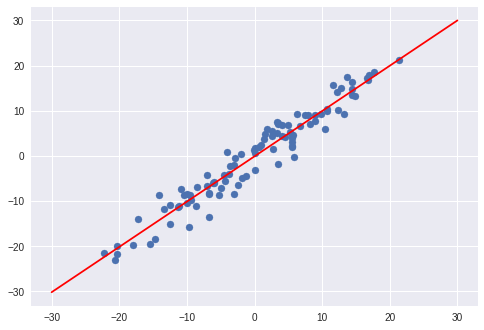

In [0]:
plot_fit("Trained Model") 